[*********************100%***********************]  1 of 1 completed
<ipython-input-17-dc4156f48001>:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  S0 = float(data["Close"].iloc[-1])  # Last closing price


S0 shape: ()
simulated_returns shape: (1000, 100)


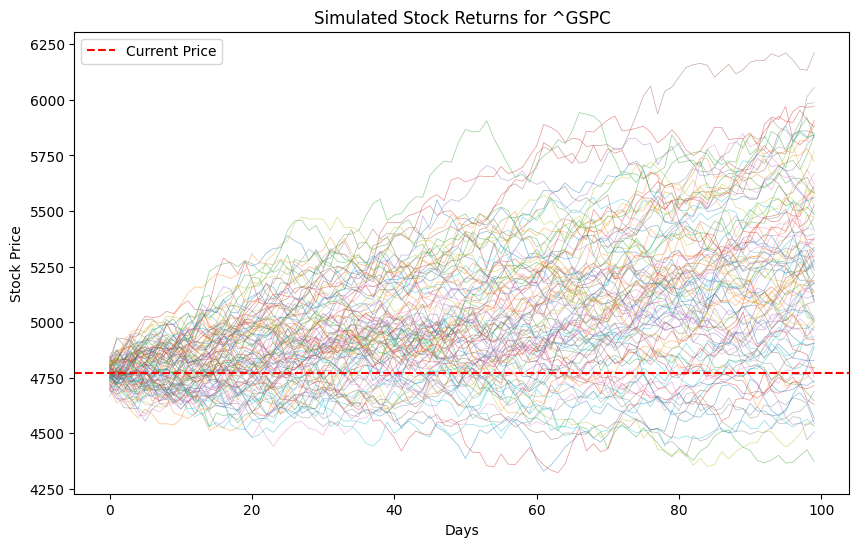

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm

# 1️⃣ Fetching real stock data (S&P 500)
stock_symbol = "^GSPC"
data = yf.download(stock_symbol, start="2023-01-01", end="2024-01-01")
S0 = float(data["Close"].iloc[-1])  # Last closing price # Converted to scalar

# 2️⃣ Estimating parameters of normal distribution
mu = np.mean(data["Close"].pct_change())  # Mean daily return
sigma = np.std(data["Close"].pct_change(), axis=0)  # Daily volatility

# 3️⃣ Generating simulated stock returns using a normal distribution
num_days = 100
num_simulations = 1000
simulated_returns = np.random.normal(mu, sigma, (num_simulations, num_days))

print(f"S0 shape: {np.shape(S0)}")  # Should be a scalar (not an array)
print(f"simulated_returns shape: {simulated_returns.shape}")  # Should be (1000, 100)



# 4️⃣ Computing stock price paths
stock_paths = S0 * np.exp(np.cumsum(simulated_returns, axis=1))

# 5️⃣ Plotting results
plt.figure(figsize=(10, 6))
for i in range(100):  # Show only 100 paths for clarity
    plt.plot(stock_paths[i, :], linewidth=0.5, alpha=0.5)
plt.axhline(S0, color='r', linestyle='dashed', label="Current Price")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.title(f"Simulated Stock Returns for {stock_symbol}")
plt.legend()
plt.show()